In [10]:
import numpy as np
import matplotlib.pyplot as plt

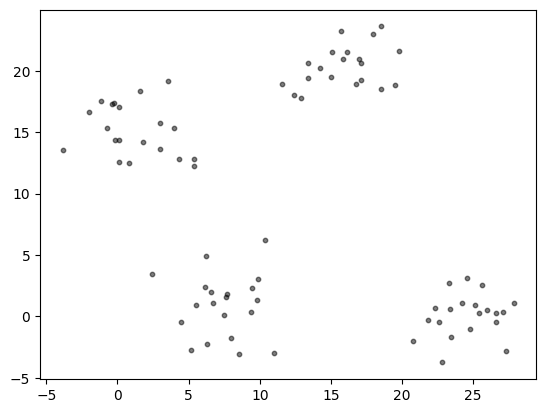

In [11]:
#データの生成
np.random.seed(123) # ランダムシードを固定

# np.r_[...]：配列を縦(row)方向に結合
x1 = np.r_[
        np.random.normal(size=20,loc=1,scale=2),
        np.random.normal(size=20,loc=8,scale=2),
        np.random.normal(size=20,loc=15,scale=2),
        np.random.normal(size=20,loc=25,scale=2)
    ] # np.random.normal(size=出力する件数, loc=平均, scale=標準偏差)：正規分布に従う乱数を発生
x2 = np.r_[
        np.random.normal(size=20,loc=15,scale=2),
        np.random.normal(size=20,loc=1,scale=2),
        np.random.normal(size=20,loc=20,scale=2),
        np.random.normal(size=20,loc=0,scale=2)
    ]
# np.c_[...]：配列を横(column)方向に結合
X = np.c_[x1,x2]

#可視化
plt.scatter(X[:,0],X[:,1],c="black",s=10,alpha=0.5)
plt.show()

80
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


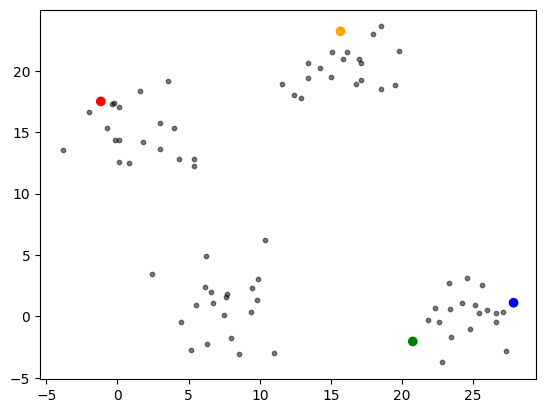

In [ ]:
# 中心点の数
K=4

# 距離の２乗を保存するサンプル数　×　グループ数の行列をつくる
n = X.shape[0] # 配列の総数を取得
distance = np.zeros(n*K).reshape(n,K) # 「80行 x 4列」のゼロ行列を作成
print(n)

# 中心点の座標を保存するための入れ物
centers = np.zeros(2*K).reshape(K,-1) # 「4行 x 2列」のゼロ行列を作成
print(centers)

# 最初の確率は均等
# np.repeat(a, n)：配列a の各要素をn回繰り返す配列を生成
pr = np.repeat(1/n,n) # 1つ目の点を選ぶ確率を、全員一律で 1/80（等確率）に設定

# 1つ目の中心点はランダムに選ばれる
# np.random.choice(配列a,取り出す要素数n, p=出現確率)：出現確率pを指定して配列aから要素n個をランダムに抽出。
# np.arange([start, ]stop, [step, ])：スタート(省略可)からストップまでのステップ(初期値1)の等差数列を生成。
centers[0,:] = X[np.random.choice(np.arange(n),1,p=pr),]

# 全データ X と、今選んだ centers[0,:] との距離の2乗を計算し、distance 行列の0列目に保存。
distance[:,0] = np.sum((X-centers[0,:])**2,axis=1) # x1 ** 2 + x2 ** 2　+ ... + xn ** 2

# 1つ目の中心点からの距離によって確率を変更
pr = np.sum(distance,axis=1)/np.sum(distance) # ここがポイント。prをnp.random.choiceの出現確率に設定している。
# 確率に従って2つ目の点を選ぶ
centers[1,:] = X[np.random.choice(np.arange(n),1,p=pr),]
distance[:,1] = np.sum((X-centers[1,:])**2,axis=1)

# 以下同様(3つ目の点)
pr = np.sum(distance,axis=1)/np.sum(distance)
centers[2,:] = X[np.random.choice(np.arange(n),1,p=pr),]
distance[:,2] = np.sum((X-centers[2,:])**2,axis=1)

pr = np.sum(distance,axis=1)/np.sum(distance)
centers[3,:] = X[np.random.choice(np.arange(n),1,p=pr),]
distance[:,3] = np.sum((X-centers[3,:])**2,axis=1)

# 可視化
plt.scatter(X[:,0],X[:,1],c="black",s=10,alpha=0.5)
plt.scatter(centers[:,0],centers[:,1],color=["r","b","g","orange"])